In [1]:
##===========================================================================##
## modules
##===========================================================================##
from IPython import get_ipython; get_ipython().magic('reset -sf') 
from numpy import pi, sqrt, array, around, log10, arange, empty
import matplotlib.pyplot as plt

##===========================================================================##
## constants 
##===========================================================================##
freq_ob = [125, 250, 500, 1000, 2000, 4000] #octave band center frequencies


In [2]:
##===========================================================================##
## 5. calculate direct field 
##===========================================================================##
a_wall = array([0.05, 0.10, 0.20, 0.25, 0.30, 0.40])  
a_ceil = array([0.05, 0.06, 0.08, 0.12, 0.15, 0.15])
a_flor = array([0.10, 0.30, 0.55, 0.65, 0.80, 0.85])
S_wall = 2*(10*6) + 2*(20*6) #m^2, surface area
S_ceil = 10*20 #m^2, surface area
S_flor = S_ceil #m^2, surface area
sS = (S_wall + S_ceil + S_flor) #m^2, total surface area
Q = 1 #directivity factor, assuming omnidirectional/at average angle

aBar = (S_wall*a_wall + S_ceil*a_ceil + S_flor*a_flor) / sS #average absorption coefficient
Rt = 1/(1-aBar) * (S_wall*a_wall + S_ceil*a_ceil + S_flor*a_flor) #m^2, room constant
rc = 0.14*sqrt(Rt*Q) #m, critical distance
print('Critical distance, rc(f) = ', str(around(rc,1)), ' m')

Critical distance, rc(f) =  [1.  1.6 2.3 2.7 3.1 3.5]  m


In [3]:
##===========================================================================##
## 6. calculate ceiling absorption required 
##===========================================================================##
a_wall = array([0.29, 0.10, 0.05, 0.04, 0.07, 0.09])  
a_flor = array([0.02, 0.06, 0.14, 0.37, 0.50, 0.65])
a_ceil = array([0.29, 0.10, 0.05, 0.04, 0.07, 0.09])
S_wall = 2*(5*3) + 2*(8*3) #m^2, surface area
S_ceil = 5*8 #m^2, surface area
S_flor = S_ceil #m^2, surface area
sS = (S_wall + S_ceil + S_flor) #m^2, total surface area

aBar = (S_wall*a_wall + S_ceil*a_ceil + S_flor*a_flor) / sS #average absorption coefficient
Rt1 = 1/(1-aBar) * (S_wall*a_wall + S_ceil*a_ceil + S_flor*a_flor) #m^2, room constant 1

NRd = -array([3, 3, 4, 5, 5, 4]) #dB, desired noise reduction
Rt2 = 10**(log10(Rt1) - NRd/10) #room constant 2, after adding absorption
a_ceil2 = (Rt2 - S_wall*a_wall - S_flor*a_flor - Rt2*S_wall*a_wall/sS - 
           Rt2*S_flor*a_flor/sS) / (S_ceil + Rt2*S_ceil/sS)
print('Required ceiling absorption coefficient(f) = ', str(around(a_ceil2,2)))

a_ceil_max = array([1, 1, 1, 1, 1, 1])
aBar3 = (S_wall*a_wall + S_ceil*a_ceil_max + S_flor*a_flor) / sS #average absorption coefficient
Rt3 = 1/(1-aBar3) * (S_wall*a_wall + S_ceil*a_ceil_max + S_flor*a_flor) #m^2, room constant 3
dLp = 10*log10(Rt1/Rt3) #dB, change in Lp in reverberant field (check)
print('Maximum change in Lp(f) = ', str(around(dLp,1)), ' dB')

Required ceiling absorption coefficient(f) =  [0.85 0.4  0.41 0.77 0.97 0.88]
Maximum change in Lp(f) =  [-3.7 -6.7 -7.6 -6.1 -5.1 -4.5]  dB


In [6]:
##===========================================================================##
## 7. calculate required transmission loss
##===========================================================================##
a_wall = array([0.14, 0.10, 0.06, 0.05, 0.04, 0.03])  
a_flor = array([0.08, 0.24, 0.57, 0.69, 0.71, 0.83])
a_ceil = array([0.76, 0.93, 0.83, 0.99, 0.99, 0.94])
S_wall = 2*(3*4) + 2*(3*5) #m^2, surface area
S_ceil = 4*5 #m^2, surface area
S_flor = S_ceil #m^2, surface area
sS = (S_wall + S_ceil + S_flor) #m^2, total surface area
sP = 3*4 #m^2, surface area of partition

aBar = (S_wall*a_wall + S_ceil*a_ceil + S_flor*a_flor) / sS #average absorption coefficient
Rt = 1/(1-aBar) * (S_wall*a_wall + S_ceil*a_ceil + S_flor*a_flor) #m^2, room constant 

LpS = array([70, 65, 62, 60, 58, 45]) #dB, sound levels in the source room   
LpR = array([45, 40, 35, 30, 25, 20]) #dB, sound levels in the receiver room   
NR = LpS - LpR #dB, noise reduction
TL = NR - 10*log10(Rt/sP) #dB, transmission loss
print('Transmission loss(f) = ', str(around(TL,1)), ' dB')

Transmission loss(f) =  [20.6 19.6 21.1 23.1 26.1 17.9]  dB


In [7]:
##===========================================================================##
## 8. calculate Sabine absorption
##===========================================================================##
S_wall = 2*(25*30) + 2*(25*35) #ft^2, surface area
S_ceil = 30*35 #ft^2, surface area
S_flor = S_ceil #ft^2, surface area
sR = (S_wall + S_ceil + S_flor) * 0.3048**2 #m^2, total surface area of reverberation room
vR = 25*30*35 * 0.3048**3 #m^3,volume of reverberation room
sS = 72 * 0.3048**2 #m^2, area of sample

T60r = array([24, 19.6, 15.2, 12, 9.5, 7.5, 4.2]) #s, T60 of reverberation room without sample 
T60w = array([22, 18, 12, 9, 7.5, 5.7, 3.5]) #s, T60 of reverberation room with sample 
#T60w = T60r-10 #s, T60 of reverberation room with sample 

aR = 0.161*vR/(sR*T60r)
aS = 0.161*vR/sS * (1/T60w - 1/T60r) - aR #see Bies, aR term not included

print('Absorption coefficient of the sample(f) = ', str(around(aS,2)))


Absorption coefficient of the sample(f) =  [0.06 0.07 0.3  0.48 0.48 0.72 0.79]


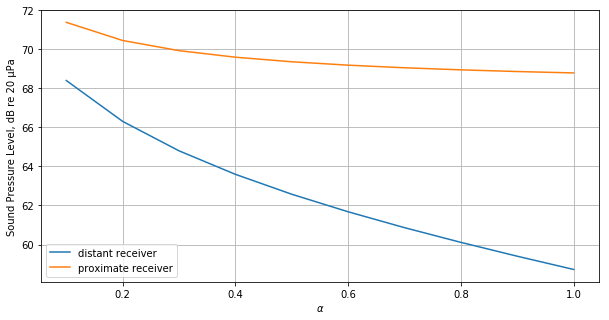

In [8]:
##===========================================================================##
## 9. room absorption
##===========================================================================##
def room_absorption(x, y, z, abs_coeffs): 
    # abs_coeffs = [a ceiling, a floor, a wall 1, a wall 2, a wall 3, a wall 4]
    Q_theta = 2
    length = 10; 
    width = 12; 
    height = 3 #m, room dimensions
    x_source = 5;
    y_source = 6;
    z_source = 3; #m, source location
    
    A_floor = length*width;
    A_ceiling = length*width;
    A_wall1 = length*height;
    A_wall2 = length*width;
    A_wall3 = length*height;
    A_wall4 = length*width;
    areas = array([A_floor, A_ceiling, A_wall1, A_wall2, A_wall3, A_wall4])
    
    alpha_bar = sum(abs_coeffs*areas)/sum(areas)
    RT = 1/(1-alpha_bar)*sum(abs_coeffs*areas)
    r = sqrt((x-x_source)**2+(y-y_source)**2+(z-z_source)**2)
    LW = 80; #dB, source power level
    L = LW + 10*log10(Q_theta/(4*pi*r**2)+4/RT)
    return L

aac = arange(0.1,1.001,0.1) #wall absorption coefficient values
nRes = len(aac)
Ldr = empty((nRes,1)) # distant receiver
Lpr = empty((nRes,1)) # proximate receiver
for ia in range(nRes):
    a_room = array([0.1,0.1,aac[ia],aac[ia],aac[ia],aac[ia]]) 
    Ldr[ia] = room_absorption(0,0,1.5,a_room)
    Lpr[ia] = room_absorption(5,6,1.5,a_room)

fig, ax1 = plt.subplots(1, 1, sharex=True, figsize=(10,5))
ax1.plot(aac, Ldr, label='distant receiver')
ax1.plot(aac, Lpr, label='proximate receiver')
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel('Sound Pressure Level, dB re 20 ' + chr(956) + 'Pa')
ax1.grid()
ax1.legend(loc='lower left')